https://www.kaggle.com/vinayakshanawad/cement-manufacturing-concrete-dataset

https://www.kaggle.com/vinayakshanawad/random-forest-with-bootstrap-sampling-for-beginner


# Análise do concreto

## Introdução

O concreto é o material mais importante na construção civil. A resistência à compressão do concreto é uma função altamente não linear da idade e dos ingredientes. Esses ingredientes incluem cimento, escória de alto forno, cinzas volantes, água, superplastificante, agregado graúdo e agregado miúdo.

Este material encontra-se dividido em três etapas: 
* 1ª Etapa: Tratamento dos dados;
* 2ª Etapa: Análises dos dados e conclusões;
* 3º Etapa: Clustering;
* 3º Etapa: Modelagem preditiva.

## Objeto de análise:

O objetivo dessa análise é criar um modelo para prever o valor de resistência à compressão do concreto. A constituição básico do concreto é:

$Concreto = Cimento + H_{2}O + Agregado_{miudo} + Agregado_{graudo}$

O dimensionamento da resistência à compressão do concreto acontece em classes, isto é, [..., 20, 25, 30, ...].

**A dosagem do concreto está relacionado com:**

* $f_{ck}$  do cimento;
* Eficiência da cura;
* Dosagem de água;
* etc...

`Resistência a compressão:` é o principal parâmetro de estruturas de concreto. No dimensionamento do concreto escolhe-se o valor da resistência referente ao cimento, isto é, deseja-se um concreto com $f_{ck} = 25$, então utiliza-se um cimento de resistência 25 e, por fim, dimensiona-seo 

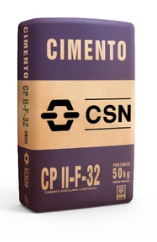




## Objetivos

Os objetivos da análise são:

* Encontrar as variáveis mais correlacionadas;
* Encotrar padrões para os valores da resistência do concreto à compressão
* Encontrar o melhor modelo preditivo;

## Informações sobre o dataset e limitações

O dataset nos forcene os seguintes dados:

Attribute Information
* Cimento : medido em $kg/m^{3}$
* Escória: medido em $kg/m^{3}$
* Cinza volante : medido em $kg/m^{3}$
* Água : medido em $kg/m^{3}$
* Super plastificante : medido em $kg/m^{3}$
* Agregado graúdo : medido em $kg/m^{3}$
* Agregado miúdo : medido em $kg/m^{3}$
* Idade : medido em dias (1~365)
* Resistência da compressão do concreto: medido em $MPa$


**FONTE:**
* https://www.kaggle.com/vinayakshanawad/cement-manufacturing-concrete-dataset


**LIMITAÇÕES DA ANÁLISE:**
* O dataset não informa o valor do $f_{ck}$ do cimento utilizado.
* O valor do $f_{ck}$ do cimento é a variável mais importante na hora do dimensionamento do concreto, por isso, provavelmente, os modelos regressivos não serão eficientes.

## Metodologia
* Para as análises e limpezada dos dados foi utilizada a linguagem de programação Python com a interface do Jupyter.

* Para as análises estatísticas foram utilizadas bibliotecas do Python.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

# configurações
import warnings
warnings.filterwarnings('ignore')

# Tratatamento e verificações iniciais

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Importando o dataset

In [4]:
concreto_df = pd.read_csv('dados/concrete.csv')
concreto_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## Renomeando o dataset

In [5]:
nomes = {
    'cement':'cimento',
    'slag':'escoria',
    'ash':'cinzas',
    'water':'agua',
    'superplastic':'super_plastificante',
    'coarseagg':'agg_graudo',
    'fineagg':'agg_miudo',
    'age':'idade',
    'strength':'fck'
}

concreto_df.rename(mapper=nomes, axis=1, inplace=True)

## Estatísticas descritivas do dataset

In [6]:
concreto_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cimento,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
escoria,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
cinzas,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
agua,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
super_plastificante,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
agg_graudo,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
agg_miudo,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
idade,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
fck,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Dados nulos, tipos de dados e otimização de memória

In [7]:
concreto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cimento              1030 non-null   float64
 1   escoria              1030 non-null   float64
 2   cinzas               1030 non-null   float64
 3   agua                 1030 non-null   float64
 4   super_plastificante  1030 non-null   float64
 5   agg_graudo           1030 non-null   float64
 6   agg_miudo            1030 non-null   float64
 7   idade                1030 non-null   int64  
 8   fck                  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


* Verifiando os tipos dos dados

In [8]:
concreto_df.isnull().sum().sum()

0

* Otimizando os dados

In [9]:
concreto_df.idade = concreto_df.idade.astype('int16')

* Verificando duplicadas

In [10]:
# filtro bolleano
duplicadas = concreto_df.duplicated()

# aplicando o filtro
concreto_df = concreto_df[~duplicadas]

## Exportando dataset modificado

In [11]:
concreto_df.to_csv('dados/concreto.csv', encoding='utf-8', index=False )

# Análise de dados

In [12]:
concreto_df.sample(3)

,cimento,escoria,cinzas,agua,super_plastificante,agg_graudo,agg_miudo,idade,fck
36,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,14,16.88
85,273.0,0.0,90.0,199.0,11.0,931.0,762.0,28,32.24
982,284.0,119.7,0.0,168.3,7.2,970.4,794.2,28,40.93


## Analisando a correlação entre as variáveis

In [13]:
def correlacao(data, var1, var2, titulo, xlabel, ylabel):
    plt.figure(figsize=(20, 8))
    sns.scatterplot(x=data[var1], y=data[var2],
                     data=data, color='orange', alpha=0.5)
    plt.grid()
    plt.title(titulo, fontsize=18)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    

### Existe alguma correlação entre o cimento e a resistência à compressão ?

Na figura abaixo pode-se verificar que o cimento e o $f_{ck}$ têm uma correlação positiva. Contudo, não é uma correlação perfeita.

 **Seria interessante classificar em intervalos a quantidade de cimento**

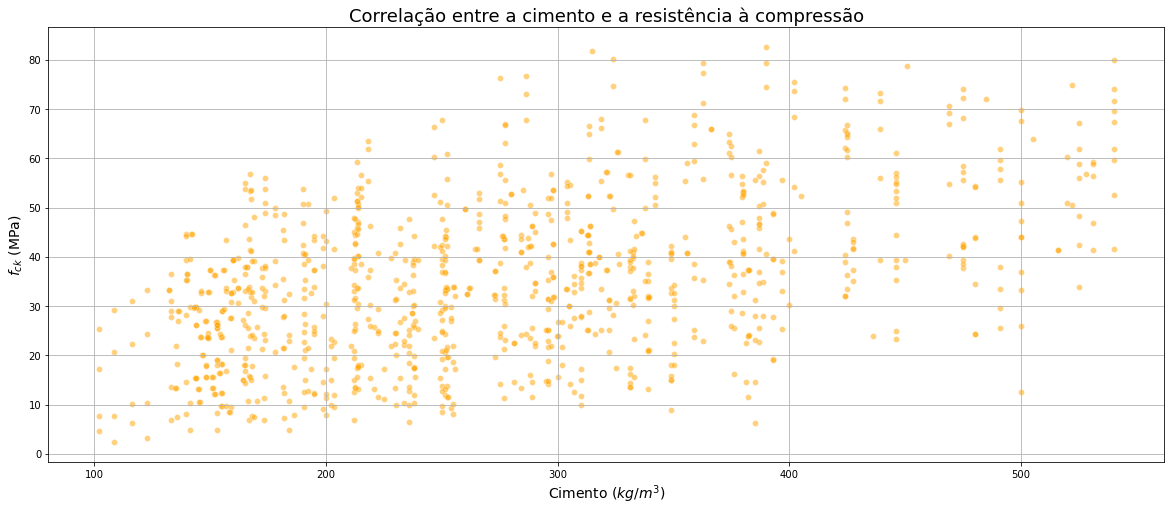

In [14]:
correlacao(concreto_df, 'cimento', 'fck', 'Correlação entre a cimento e a resistência à compressão', 'Cimento ($kg/m^{3}$)', '$f_{ck}$ (MPa)')

### Existe alguma correlação entre a água e a resistência à compressão ?

> Na figura abaixo pode-se verificar que a água e o $f_{ck}$ têm uma correlação fraca.

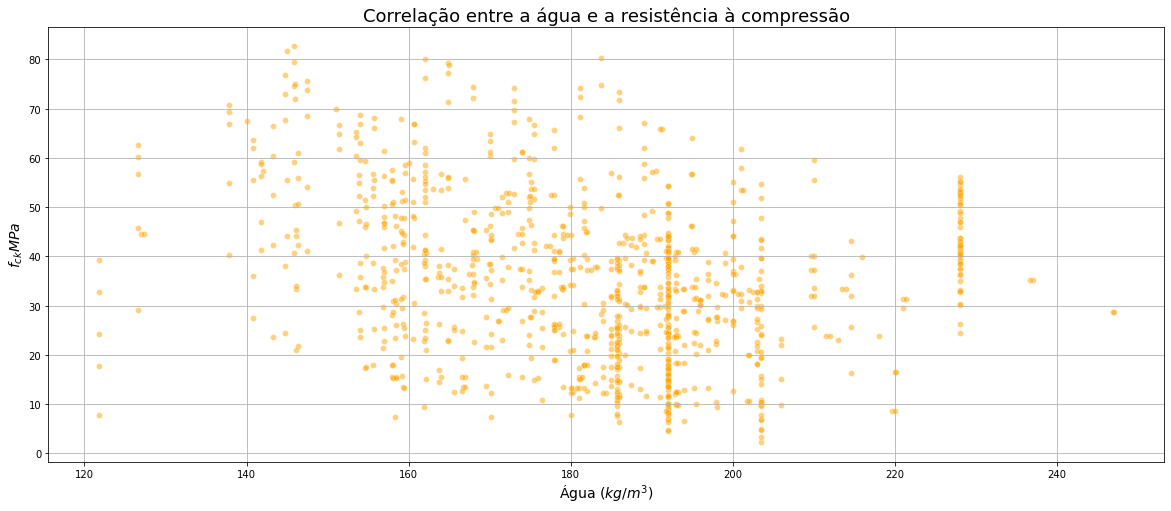

In [15]:
correlacao(concreto_df, 'agua', 'fck', 'Correlação entre a água e a resistência à compressão', 'Água ($kg/m^{3}$)', '$f_{ck} MPa$')

### Existe alguma correlação entre a idade e a resistência à compressão ?

> Na figura abaixo pode-se verificar que a idade e o $f_{ck}$ têm uma correlação fraca. Além disso, vale salientar que as medições de resistência foram realizadas em um intervalo pré-definido [  1,   3,   7,  14,  28,  56,  90,  91, 100, 120, 180, 270, 360,
       365].

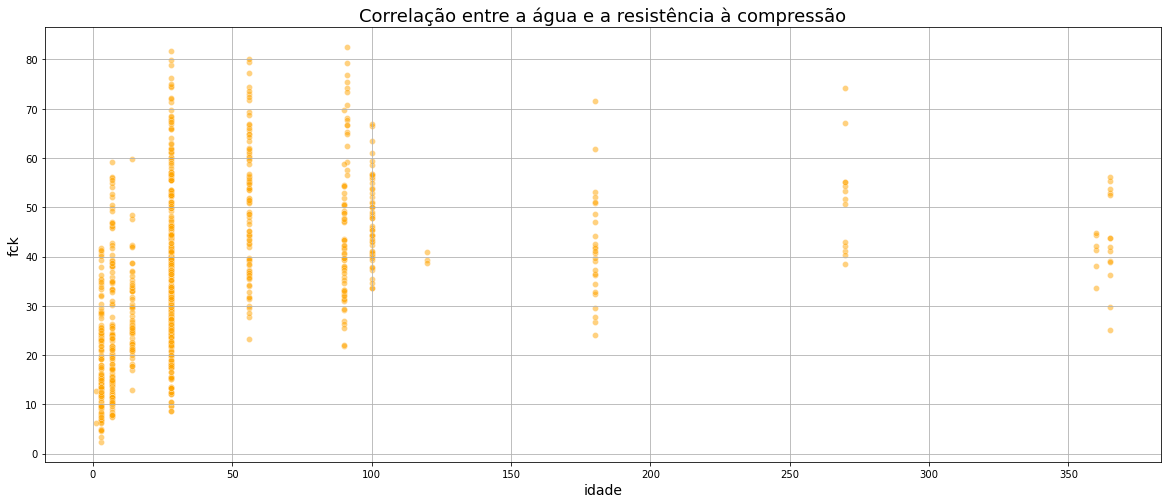

In [16]:
correlacao(concreto_df, 'idade', 'fck', 'Correlação entre a água e a resistência à compressão', 'idade', 'fck')

In [17]:
np.sort(concreto_df.idade.unique())


array([  1,   3,   7,  14,  28,  56,  90,  91, 100, 120, 180, 270, 360,
       365], dtype=int16)

### Verificando a correlação entre escória e fck

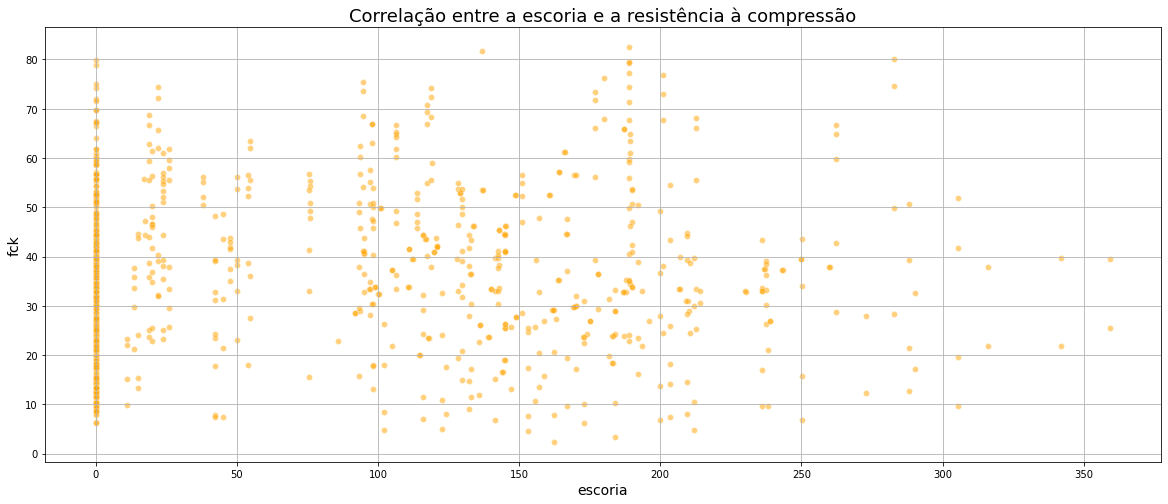

In [54]:
correlacao(concreto_df, 'escoria', 'fck', 'Correlação entre a escoria e a resistência à compressão', 'escoria', 'fck')

### Verificando a correlação entre a cinzas e o fck

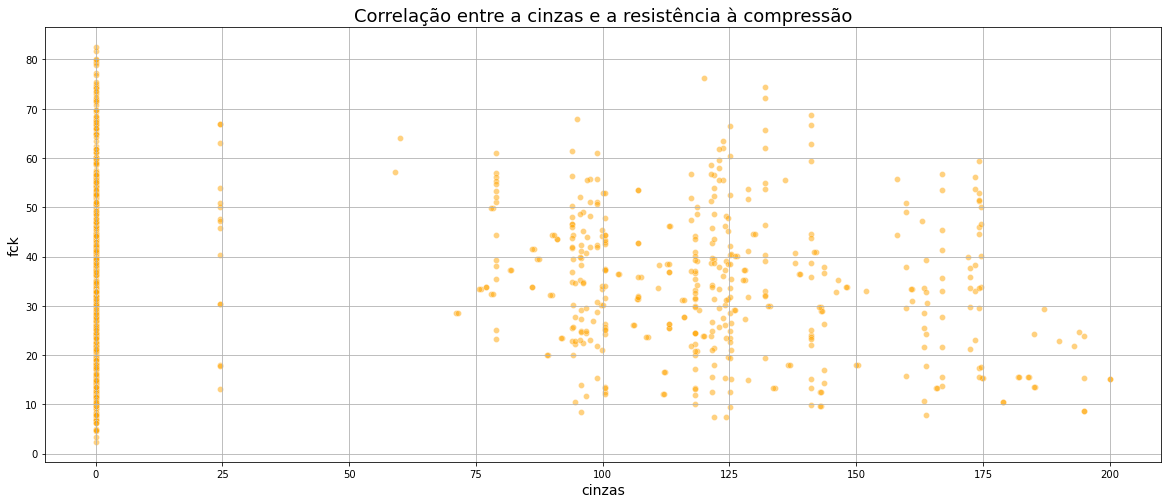

In [56]:
correlacao(concreto_df, 'cinzas', 'fck', 'Correlação entre a cinzas e a resistência à compressão', 'cinzas', 'fck')

### Verificando a correlação de todas as features

In [18]:
concreto_df.corr()

,cimento,escoria,cinzas,agua,super_plastificante,agg_graudo,agg_miudo,idade,fck
cimento,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
escoria,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
cinzas,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
agua,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
super_plastificante,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
agg_graudo,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
agg_miudo,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
idade,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
fck,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


Como foi verificado a variável que tem a maior correlação com o fck é o cimento (comportamento esperado). Por fim, as outras variáveis investigadas não apresentam uma correlação muito forte.

## Análise univariada

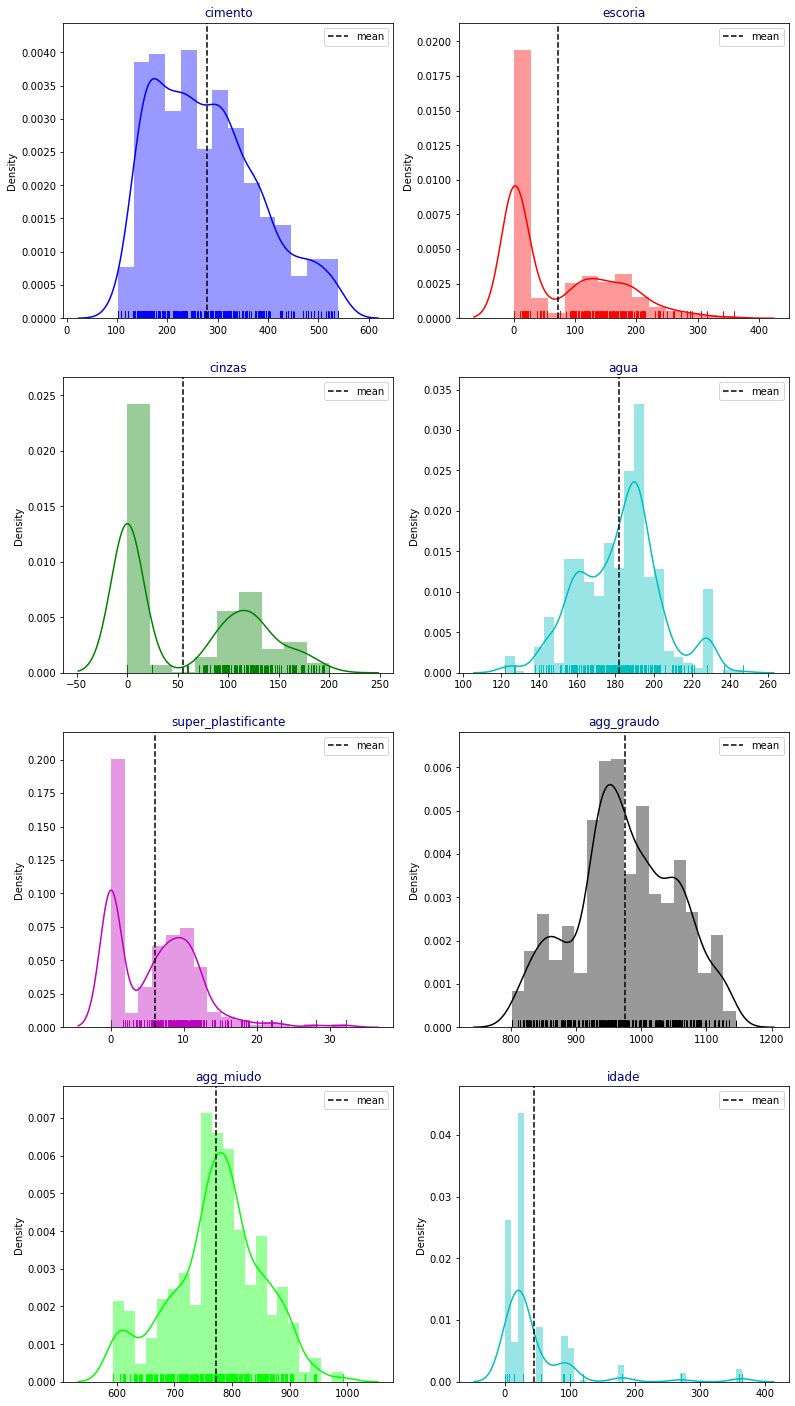

In [19]:
cols = [i for i in concreto_df.columns if i not in 'fck']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(concreto_df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(concreto_df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

**FEATURES**
* Cimento - Distribuição assimétrica à direita - o cimento é assimétrico para valores mais altos

* Escória - distribuição assimétrica à direita - a escória é assimétrica para valores mais altos e existem duas gaussianas 

* Cinzas - distribuição assimétrica à direita - as cinzas são assimétricas para valores mais altos e existem duas gaussianas

* Água - Distribuição assimétrica moderadamente à esquerda

* Superplástica - distribuição assimétrica à direita - superplástico é assimétrico para valores mais altos e existem duas gaussianas

* Agregado graúdo - Distribuição assimétrica moderadamente à esquerda

* Agregado miúdo - Distribuição assimétrica moderadamente à esquerda

* Idade - distribuição assimétrica à direita - a idade é assimétrica para valores mais altos e existem cinco gaussianas



## Verificando outliers

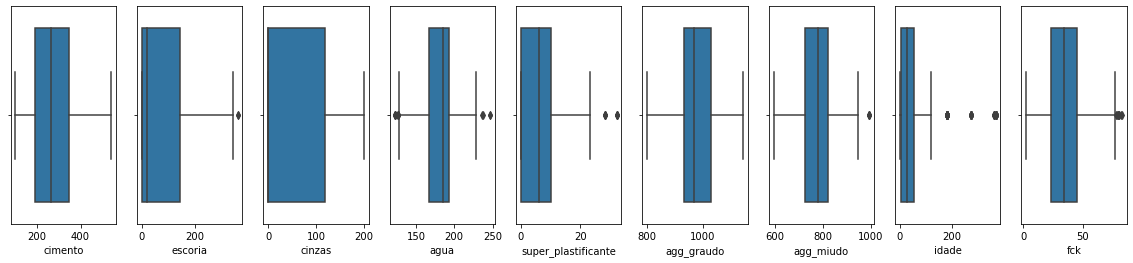

In [20]:
columns = concreto_df.columns
i=1

plt.figure(figsize=(20, 4))
for each in columns:
    df = concreto_df[each]
    plt.subplot(1, len(columns), i)
    sns.boxplot(df)
    i += 1

# Clustering

https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering

## Ajustando o dataset

In [21]:
cluster_df = concreto_df.copy()
cluster_df.drop(labels='idade', axis=1, inplace=True)
cluster_df.sample(3)

,cimento,escoria,cinzas,agua,super_plastificante,agg_graudo,agg_miudo,fck
183,102.0,153.0,0.0,192.0,0.0,887.0,942.0,7.68
41,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,60.32
558,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,13.33


## Pré-processamento

In [58]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
X_num = mmscaler.fit_transform(X.select_dtypes(exclude=['object']))





## Métricas de avaliação

## Modelos de clustering

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters = 3, random_state=9)

In [24]:
X = cluster_df

In [25]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=9)

<AxesSubplot:xlabel='fck', ylabel='cimento'>

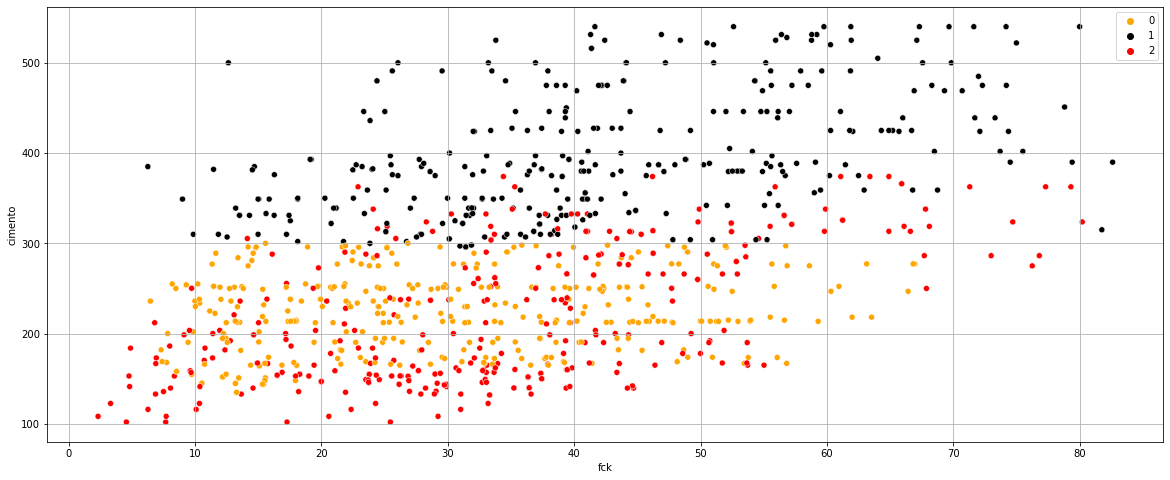

In [26]:
colors = {
    0:'orange',
    1:'black',
    2:'red',
}

plt.figure(figsize=(20, 8))
plt.grid()
sns.scatterplot(x = 'fck', y = 'cimento', data=cluster_df, hue = kmeans.labels_, palette=colors)

In [27]:
cluster_df['clusters_kmeans'] = kmeans.labels_

In [28]:
cluster_df.groupby('clusters_kmeans')['fck'].mean().to_frame().round(2)

,fck
clusters_kmeans,
0,29.66
1,42.08
2,34.25


In [52]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(X)

AffinityPropagation()

<AxesSubplot:xlabel='fck', ylabel='cimento'>

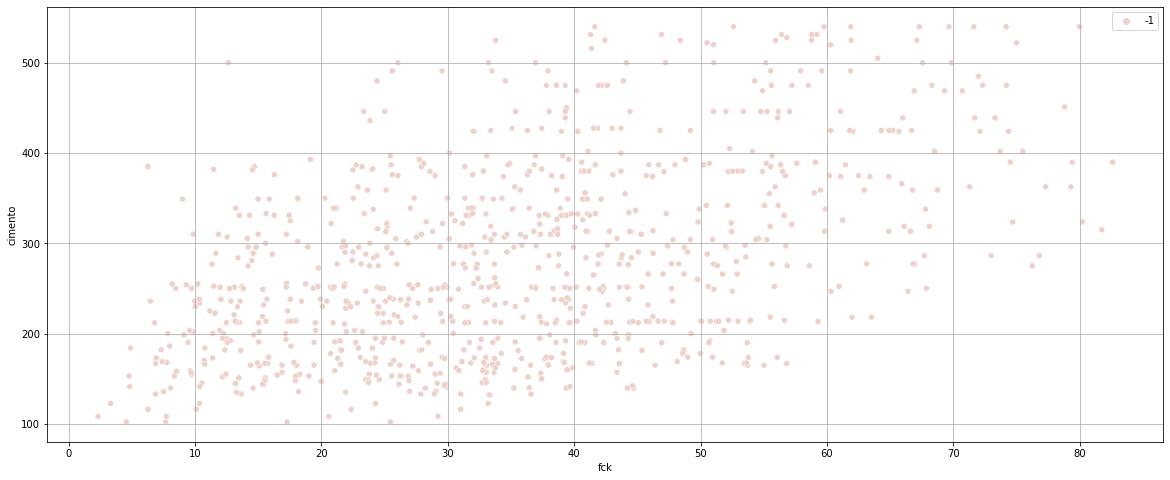

In [53]:
plt.figure(figsize=(20, 8))
plt.grid()
sns.scatterplot(x = 'fck', y = 'cimento', data=cluster_df, hue = ap.labels_)

In [29]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=2)

sc.fit(X)

SpectralClustering(n_clusters=2)

<AxesSubplot:xlabel='fck', ylabel='cimento'>

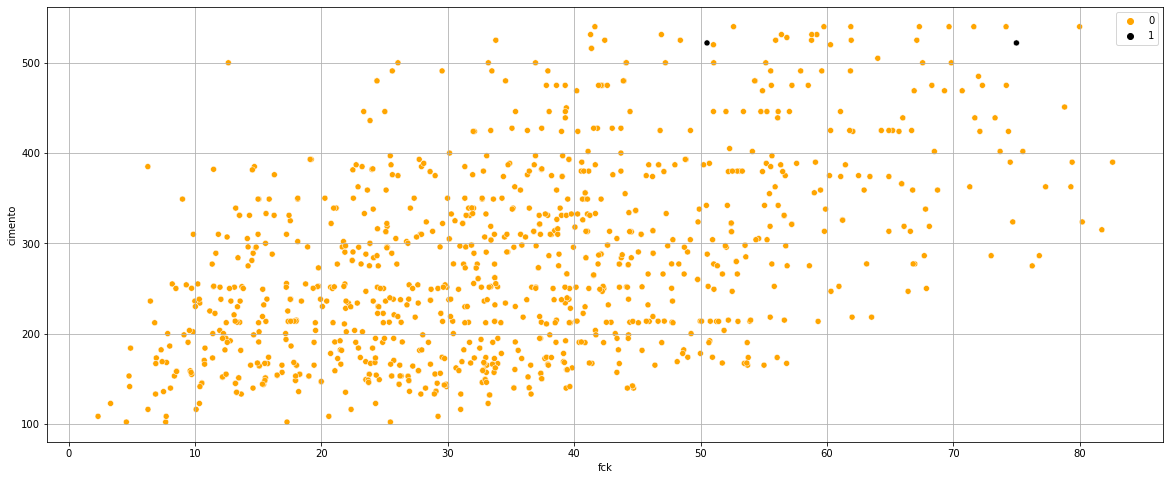

In [30]:
colors = {
    0:'orange',
    1:'black',
    2:'red',
}


plt.figure(figsize=(20, 8))
plt.grid()
sns.scatterplot(x = 'fck', y = 'cimento', data=cluster_df, hue = sc.labels_, palette=colors)

In [31]:
cluster_df['clusters_spectral'] = sc.labels_

In [32]:
cluster_df.groupby('clusters_spectral')['fck'].mean().to_frame().round(2)

,fck
clusters_spectral,
0,35.20
1,62.75


In [33]:
%%time
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(max_iter=1000)

ap.fit(X)

Wall time: 29.3 s


AffinityPropagation(max_iter=1000)

<AxesSubplot:xlabel='fck', ylabel='cimento'>

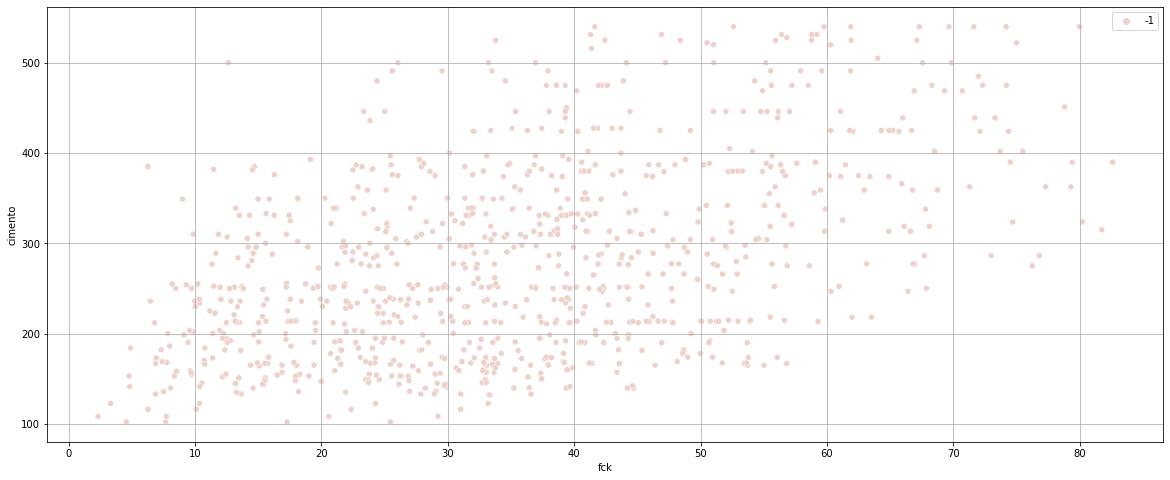

In [34]:
plt.figure(figsize=(20, 8))
plt.grid()
sns.scatterplot(x = 'fck', y = 'cimento', data=cluster_df, hue = ap.labels_)

Wall time: 83.8 ms


<AxesSubplot:xlabel='fck', ylabel='cimento'>

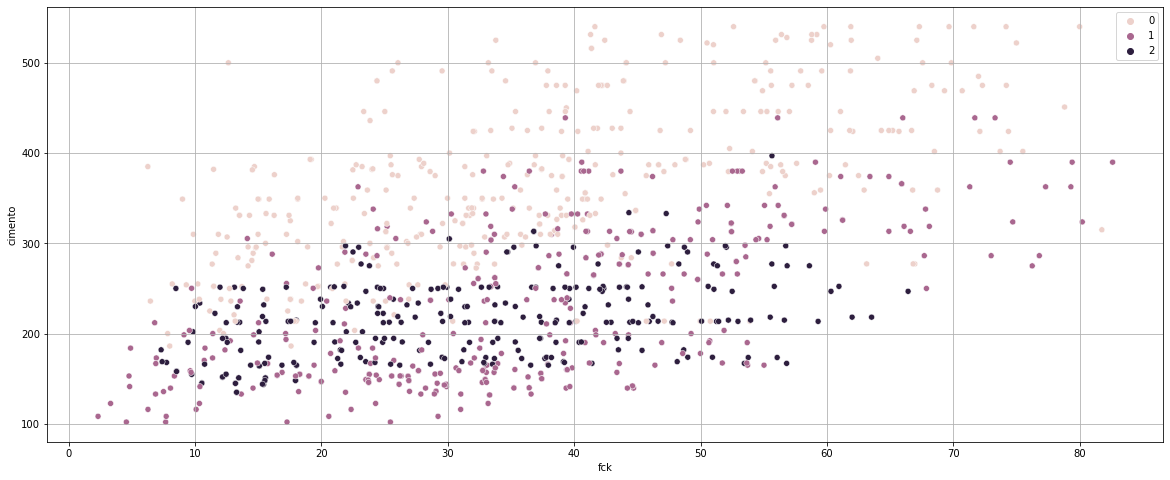

In [35]:
%%time
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=3)

ag.fit(X)

plt.figure(figsize=(20, 8))
plt.grid()
sns.scatterplot(x = 'fck', y = 'cimento', data=cluster_df, hue = ag.labels_)

In [36]:
cluster_df['clusters_agg'] = ag.labels_
cluster_df.groupby('clusters_agg')['fck'].mean().to_frame().round(2)

,fck
clusters_agg,
0,37.08
1,36.21
2,31.32


# Regressão

## Ajustando o dataset

In [37]:
# fazendo uma cópia
predict_df = concreto_df.copy()

# removendo as colunas desnecessárias
predict_df.drop(columns='idade', axis=1, inplace=True)

## Pré-processamento

In [38]:
filtro_reg = (predict_df.fck < 50) & (predict_df.agua < 225) 

In [39]:
predict_df = predict_df[filtro_reg]

## Seleção e separação das variáveis

<hr>

**Variável objetivo**

* Variável $y$: $f_{ck}$

<hr>

* Variável $x_1$: Cimento;

* Variável $x_2$: Escoria

* Variável $x_3$: Cinzas

* Variável $x_4$: Plastificante

* Variável $x_{5}$: Agregado graúdo

* Variável $x_{6}$: Agregado miúdo


<hr>

In [40]:
X_pred = predict_df.drop(columns='fck', axis=1)
y_pred = predict_df.fck

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score

# Separando as variáves de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_pred, y_pred, test_size=0.25, random_state=50)

## Pré-processamento

In [42]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder

# # fazendo o preprocessamento dos dados
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)


## Métricas de avaliação para modelos regressivos

As [métricas](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) de avaliação para modelos regressivos são as seguintes:

*  **R2**


$R^{2}(y, \hat{y})= 1 - \frac{\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2}}{\sum_{i=1}^{n}(y_{i} - \bar{y_{i}})^{2}}$

The best possible score is 1.0, lower values are worse.

*  **MAE**

Como o próprio nome sugere, o MAE calcula o erro médio absoluto entre os valores
reais e os previstos. Ela retorna um valor não negativo, que quanto mais próximo de 0 indica que
os valores previstos encontram-se bem próximos dos reais. O cálculo do MAE é realizado com a a seguinte expressão:

$\text{MAE}(y, \hat{y}) = \frac{1}{n_{amostras}} \sum_{i=0}^{n_{amostras}-1} |y_{i} - \hat{y_{i}}|$

* **MSE**

Mais próximo de zero, melhor o modelo.

$\text{MSE}(y, \hat{y}) = \frac{1}{n_{amostras}} \sum_{i=0}^{n_{amostras}-1} (y_{i} - \hat{y_{i}})^{2}$

* **Explained variance**

$explained\_variance (y, \hat{y}) = 1 - \frac{Var(y - \hat{y})}{Var(y)}  $

The best possible score is 1.0, lower values are worse.

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import explained_variance_score as evc

def validar_modelo(y_test, y_pred):
    i = 3
    print('      Métricas')
    print('***'*6)
    print(f' R2 : {round(r2_score(y_test, y_pred), i)}')
    print(f' EVC: {round(evc(y_test, y_pred), i)}')
    print('---'*6)
    print(f' MAE: {round(mae(y_test, y_pred), i)}')
    print(f' MSE: {round(mse(y_test, y_pred), i)}')
    print('***'*6)

## Modelos preditivos

### SVM

In [44]:
%%time
from sklearn.svm import SVR

svc = SVR()
svc.fit(X_train, y_train)
validar_modelo(y_test, svc.predict(X_test))

      Métricas
******************
 R2 : 0.079
 EVC: 0.109
------------------
 MAE: 8.901
 MSE: 119.186
******************
Wall time: 42.9 ms


### Linear Regression

In [45]:
%%time
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
validar_modelo(y_test, lr.predict(X_test))

      Métricas
******************
 R2 : 0.283
 EVC: 0.295
------------------
 MAE: 7.917
 MSE: 92.817
******************
Wall time: 30.9 ms


### K-means

In [46]:
%%time
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor(n_neighbors=10)
kn.fit(X_train, y_train)
validar_modelo(y_test, kn.predict(X_test))

      Métricas
******************
 R2 : 0.3
 EVC: 0.318
------------------
 MAE: 7.595
 MSE: 90.602
******************
Wall time: 14 ms


### DecisionTree

In [47]:
%%time
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_train)
validar_modelo(y_test, dt.predict(X_test))

      Métricas
******************
 R2 : 0.161
 EVC: 0.183
------------------
 MAE: 8.353
 MSE: 108.588
******************
Wall time: 9.97 ms


### RandomForest

In [48]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=4, n_estimators=200)
rf.fit(X_train, y_train)
validar_modelo(y_test, rf.predict(X_test))

      Métricas
******************
 R2 : 0.295
 EVC: 0.317
------------------
 MAE: 7.538
 MSE: 91.232
******************
Wall time: 388 ms


### AdaBoostRegressor

In [49]:
%%time
from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor()
ab.fit(X_train, y_train)
validar_modelo(y_test, ab.predict(X_test))

      Métricas
******************
 R2 : 0.276
 EVC: 0.287
------------------
 MAE: 7.742
 MSE: 93.7
******************
Wall time: 35.9 ms


### ExtraTrees

In [50]:
%%time
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor()
et.fit(X_train, y_train)
validar_modelo(y_test, et.predict(X_test))

      Métricas
******************
 R2 : 0.025
 EVC: 0.068
------------------
 MAE: 8.4
 MSE: 126.225
******************
Wall time: 168 ms


# Conclusões